# Lab I - Dimensionality Reduction

## Libraries

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import io
from PIL import Image
from flask import Flask, request, jsonify
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## Exercise 1

In [2]:
#create of rectangular matrix
A = np.random.rand(2,3)
print(A)

[[0.07787676 0.85683588 0.25252703]
 [0.44128921 0.84119841 0.66922301]]


### Trace of A

In [3]:
#The trace of A refers to the sum of the diagonal. Being a 2*3 rectangular matrix, the trace would be the sum of 2 values ​​that are: 0.01363874 and 0.6813813
#applying matrix.trace() method
trace=A.trace()
print(trace)

0.9190751730606138


### Rank of A

In [4]:
rank = np.linalg.matrix_rank(A)
rank

2

### Determinant of A

In [5]:
#Determinant of a matrix should be an error because determinant only is for square matrix
determinant = np.linalg.det(A)
determinant

LinAlgError: Last 2 dimensions of the array must be square

### Can you invert A? How?

In [6]:
invert=np.linalg.pinv(A)
invert

array([[-1.30708889,  1.22144814],
       [ 1.63906903, -0.49882435],
       [-1.1983719 ,  1.31585191]])

### Eigenvalues and eigenvectors

#### A'A

In [7]:
U, S, VT = np.linalg.svd(A.T @ A)
print("Left Singular Vectors (U):")
print(U)

print("\nSingular Values (Eigenvalues):")
print(S)

print("\nRight Singular Vectors (VT):")
print(VT)

Left Singular Vectors (U):
[[-0.28008613  0.59897562 -0.75018662]
 [-0.83073    -0.54285409 -0.12327655]
 [-0.48108153  0.58867448  0.64963292]]

Singular Values (Eigenvalues):
[2.04074836e+00 1.13464426e-01 3.45701748e-17]

Right Singular Vectors (VT):
[[-0.28008613 -0.83073    -0.48108153]
 [ 0.59897562 -0.54285409  0.58867448]
 [ 0.75018662  0.12327655 -0.64963292]]


#### AA'

In [8]:
U, S, VT = np.linalg.svd(A @ A.T)
print("Left Singular Vectors (U):")
print(U)

print("\nSingular Values (Eigenvalues):")
print(S)

print("\nRight Singular Vectors (VT):")
print(VT)

Left Singular Vectors (U):
[[-0.59857826 -0.80106434]
 [-0.80106434  0.59857826]]

Singular Values (Eigenvalues):
[2.04074836 0.11346443]

Right Singular Vectors (VT):
[[-0.59857826 -0.80106434]
 [-0.80106434  0.59857826]]


Having a 2x3 matrix, when I multiply A'A I am left with a 3x3 matrix and when I multiply AA' I am left with a 2x2 matrix

## Exercise 2

In [9]:
from PIL import Image
img = Image.open("Ana Estefania Henao.JPG")
area = (300, 200, 800, 800)
cropped_img = img.crop(area)
cropped_img.show()

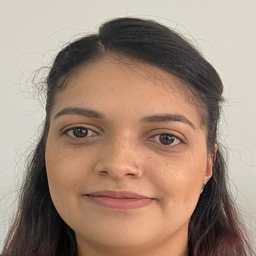

In [10]:
image = cropped_img.resize([256,256])
image

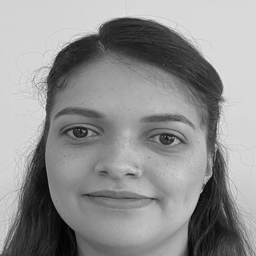

In [11]:
grayscale_img = image.convert("L")
grayscale_img

Then, we need the photos of the class, so, i have to set the folder path. The path below corresponds to the folder available in the channel of Microsoft Teams

In [12]:
folder_path = "C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas"

# Use os.listdir() to get a list of all items (files and directories) in the folder
items_in_folder = os.listdir(folder_path)
photos_names = []

# Filter out only the .jpg files
jpg_files = [item for item in items_in_folder if item.endswith(".jpg")]

# Print the extracted .jpg file names
for jpg_file in jpg_files:
    photos_names.append(jpg_file)
photos_names

['AE256.jpg',
 'AnaEstefaniaHenaogrises.jpg',
 'AndresFelipeOrrego.jpg',
 'DanielAcosta.jpg',
 'DanielRestrepo.jpg',
 'Diego.jpg',
 'edward_giraldo_gray.jpg',
 'edwar_ramirez_gs.jpg',
 'esteban_jm.jpg',
 'FedericoOcampo.jpg',
 'Fernando_Franco_grayscale.jpg',
 'Foto_procesada.jpg',
 'JenniferD.jpg',
 'jessica_torres_f.jpg',
 'johan_vargas.jpg',
 'JuanJoseGilHoyos_grayscale.jpg',
 'Laura_Torres_prep.jpg',
 'Lina_Beltran.jpg',
 'lina_montoya.jpg',
 'maria_ipia.jpg',
 'OsvalAgudelo256256.jpg',
 'SEBASTIANHOLGUINOSORIO.jpg',
 'sebastian_torres.jpg',
 'SGZ_gray.jpg',
 'shir.jpg',
 'Vanessa_256x256_grises.jpg',
 'Viviana_256x256_grises.jpg']

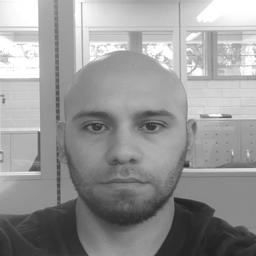

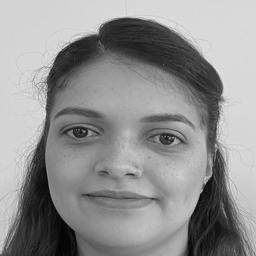

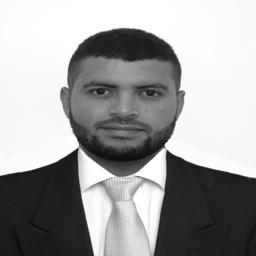

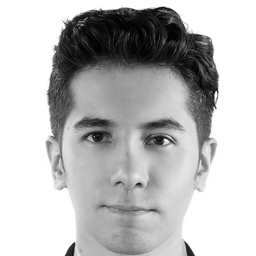

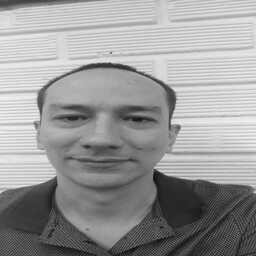

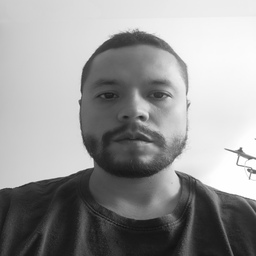

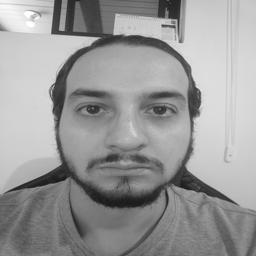

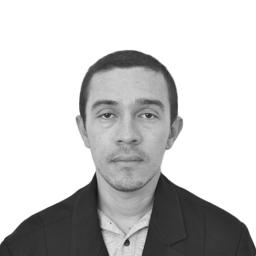

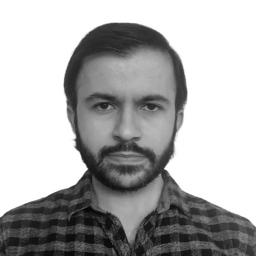

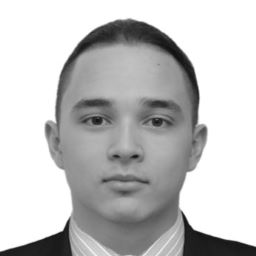

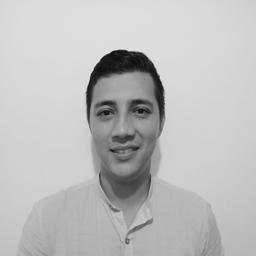

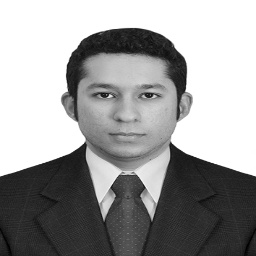

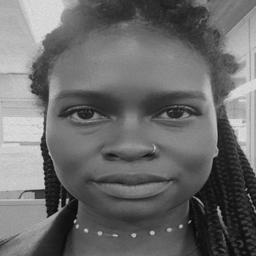

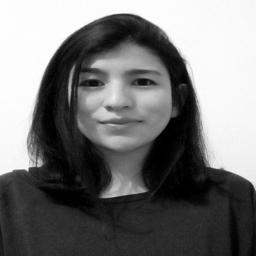

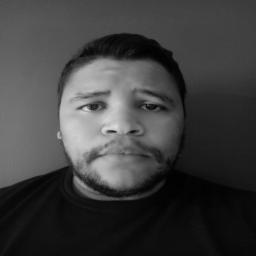

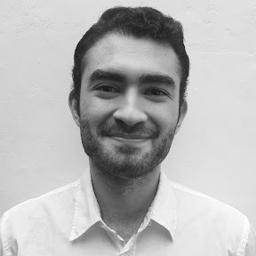

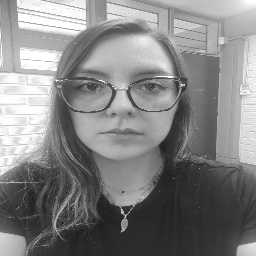

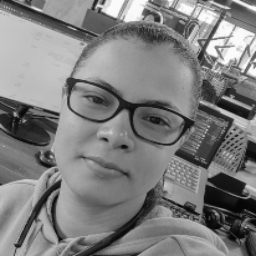

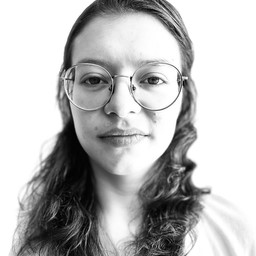

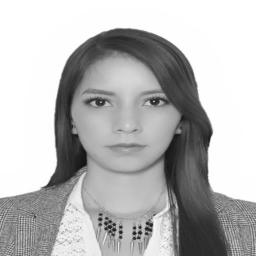

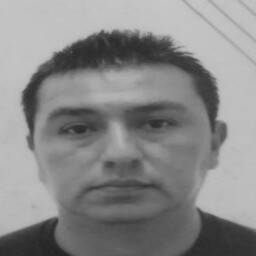

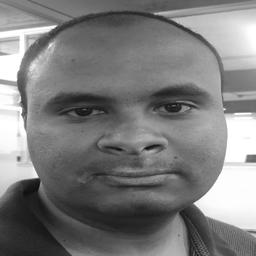

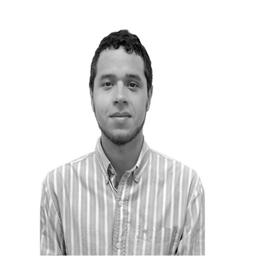

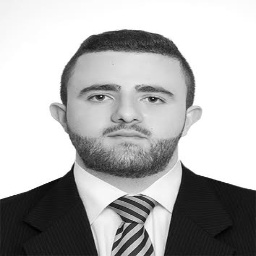

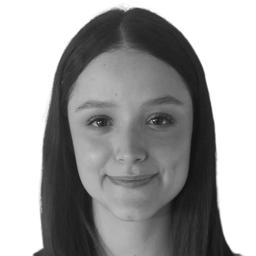

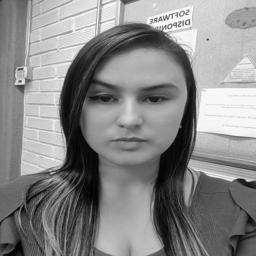

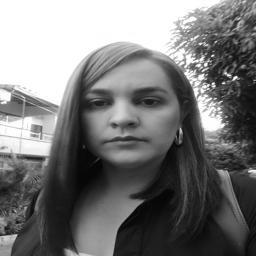

In [13]:
photo_paths = []
for i in photos_names:
    photo_path = folder_path + '/' + i
    photo_paths.append(photo_path)
    photo = Image.open(photo_path)
    display(photo)

In [14]:
photo_paths

['C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AE256.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AnaEstefaniaHenaogrises.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/AndresFelipeOrrego.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/DanielAcosta.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/DanielRestrepo.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/Diego.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/edward_giraldo_gray.jpg',
 'C:/Users/estef/Universidad de Antioquia/Cohorte 5 2023-1[] - Machine Learning II/Fotos Procesadas/edwar_ramirez_gs.jpg',
 'C:/Users/estef/Universidad de 

In [15]:
# Define a common size for all images (e.g., 256x256)
common_size = (256, 256)

# Initialize an accumulator matrix to store the sum of all pixel values
total_matrix_needed = None

# Iterate through the images and accumulate the pixel values
for image_path_needed in photo_paths:
    # Load and read the image as a matrix    
    image_first_needed = cv2.imread(image_path_needed)
    
    if image_first_needed is not None:
        
        # Resize the image to the common size        
        image_needed = cv2.resize(image_first_needed, common_size)
        
        # Convert the image to a NumPy array        
        image_matrix_needed = np.array(image_needed, dtype=np.float32)
        
        # Add the image matrix to the accumulator matrix        
        if total_matrix_needed is None:
            total_matrix_needed = image_matrix_needed
        else:
            total_matrix_needed += image_matrix_needed
            
    else:
        print(f"Failed to load image: {image_path_needed}")
        
# Calculate the average face by dividing the accumulated matrix by the number of images
num_valid_images = len(photo_paths)-photo_paths.count(None)
average_face_matrix = total_matrix_needed / num_valid_images

# Now, average_face_matrix contains the average face as a NumPy array

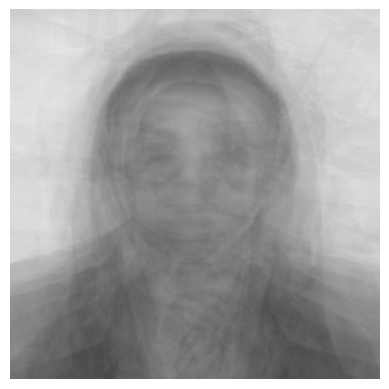

In [16]:
average_image_cohort_first = average_face_matrix.astype(np.uint8)

plt.imshow(average_image_cohort_first)
plt.axis('off')
plt.savefig('average_face.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

Save the photo

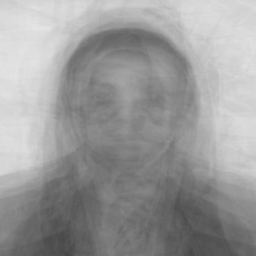

In [17]:
average_image_cohort_second = Image.open("average_face.jpg")
average_image_cohort_third = average_image_cohort_second.resize([256,256])
average_image_cohort_third

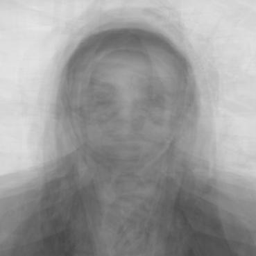

In [18]:
# Convert the image to grayscale
average_image_cohort = average_image_cohort_third.convert("L")
average_image_cohort

Distance

In [19]:
# Load your face image and average face image (assuming they are grayscale)

My_face_matrix = np.array(grayscale_img, dtype=np.float32)
average_face_cohort_matrix = np.array(average_image_cohort, dtype=np.float32)

# Calculate the mean squared error (MSE) distance
mse_distance = np.mean((My_face_matrix - average_face_cohort_matrix) ** 2)

print(f'Mean Squared Error (MSE) Distance: {mse_distance:.2f}')

Mean Squared Error (MSE) Distance: 2505.22


According to the results obtained, the distance from my face to the face of the other classmates is small compared to that of my classmate Juan Jose. This may be due to the fact that my photo is much more centered on the face, while the one of the colleagues covers both the face and part of their body.

## Exercise 3

Creating an unsupervised Python package typically involves several steps, from defining the problem you want to solve to packaging and distributing your code. 

### SVD

SVD stands for Singular Value Decomposition, and it is a fundamental matrix factorization technique used in linear algebra and numerical analysis. SVD is widely used in various data analysis and machine learning tasks, such as dimensionality reduction, recommendation systems, and data compression.

In [20]:
class SVD_class:
    def __init__(self, matrix):
        self.matrix = matrix
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self):
        self.U, self.S, self.Vt = self._svd_decomposition(self.matrix)

    def fit_transform(self):
        self.fit()
        return self.transform()

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")

        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt

        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

# Example usage:
if __name__ == "__main__":
    X_SVD = np.array([[1, 2],
                  [3, 4],
                  [5, 6]])
    svd = SVD_class(X_SVD)

    # Fit and perform SVD decomposition
    svd.fit()
    U, S, Vt = svd.U, svd.S, svd.Vt

    print("Matrix U:")
    print(U)
    print("\nSingular Values:")
    print(S)
    print("\nMatrix Vt:")
    print(Vt)

    # Transform the matrix using fitted SVD

    transformed_matrix = svd.transform()
    print("\nTransformed Matrix:")
    print(transformed_matrix)

    # Fit and transform in one step
    transformed_matrix_fit = svd.fit_transform()
    print("\nTransformed Matrix (Fit and Transform):")
    print(transformed_matrix_fit)

Matrix U:
[[-0.2298477  -0.88346102  0.40824829]
 [-0.52474482 -0.24078249 -0.81649658]
 [-0.81964194  0.40189603  0.40824829]]

Singular Values:
[9.52551809e+00 5.14300581e-01 8.72994256e-10]

Matrix Vt:
[[-5.90229186e+00 -7.47652631e+00]
 [ 4.03671673e-01 -3.18675803e-01]
 [-9.43689571e-16  9.99200722e-16]]

Transformed Matrix:
[[12.73917226 16.51403919]
 [29.45241823 37.41062764]
 [46.1656642  58.3072161 ]]

Transformed Matrix (Fit and Transform):
[[12.73917226 16.51403919]
 [29.45241823 37.41062764]
 [46.1656642  58.3072161 ]]


U is the left singular vectors matrix.
S is a 1-D array containing the singular values.
VT is the transpose of the right singular vectors matrix.

It is evident in the results obtained that the transformed matrix and the transformed matrix (fit and transform) give the same value.

In [21]:
# Perform SVD decomposition
U, S, Vt = np.linalg.svd(X_SVD, full_matrices=False)

# Print the results
print("Matrix U:")
print(U)
print("\nSingular Values:")
print(S)
print("\nMatrix Vt:")
print(Vt)

# Transform the matrix using SVD
transformed_matrix = np.dot(U, np.dot(np.diag(S), Vt))
print("\nTransformed Matrix:")
print(transformed_matrix)

# Fit and transform in one step
transformed_matrix_fit = np.dot(U, np.dot(np.diag(S), Vt))
print("\nTransformed Matrix (Fit and Transform):")
print(transformed_matrix_fit)

Matrix U:
[[-0.2298477   0.88346102]
 [-0.52474482  0.24078249]
 [-0.81964194 -0.40189603]]

Singular Values:
[9.52551809 0.51430058]

Matrix Vt:
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

Transformed Matrix:
[[1. 2.]
 [3. 4.]
 [5. 6.]]

Transformed Matrix (Fit and Transform):
[[1. 2.]
 [3. 4.]
 [5. 6.]]


### PCA

PCA, or Principal Component Analysis, is a dimensionality reduction technique used in data analysis and machine learning to reduce the number of features (variables or dimensions) in a dataset while preserving as much of the original information as possible. It does this by finding linear combinations of the original features called principal components, which capture the maximum variance in the data.

In [22]:
class PCA_class:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        # Calculate the mean of the data
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Perform eigenvalue decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]
        else:
            self.components = eigenvectors

    def transform(self, X):
        if self.components is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")

        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Example usage:

if __name__ == "__main__":    

    np.random.seed(0)
    X_PCA = np.random.rand(100, 50) #100 samples, 50 features
    
    # Initialize and use the PCA class
    pca = PCA_class(n_components=2)
    pca.fit(X_PCA)
    X_transformed = pca.fit_transform(X_PCA)

    print("Original X:")
    print(X_PCA)
    print("\nTransformed X:")
    print(X_transformed)

Original X:
[[0.5488135  0.71518937 0.60276338 ... 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 ... 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 ... 0.91948261 0.7142413  0.99884701]
 ...
 [0.22996725 0.38153411 0.05718279 ... 0.6781559  0.99735368 0.07799664]
 [0.75896886 0.81742451 0.28220144 ... 0.36130004 0.99238159 0.65696337]
 [0.25107007 0.53286606 0.09523193 ... 0.19738826 0.39868722 0.9585931 ]]

Transformed X:
[[ 0.30895165 -0.34363356]
 [-0.1752182   0.10585016]
 [-0.30849383  0.42951593]
 [-0.29370052  0.26801367]
 [ 0.05015827 -0.11671786]
 [ 0.7809401  -0.52242425]
 [ 0.32759337 -0.21652829]
 [-0.93874466  0.58847971]
 [ 0.79844958 -0.86778556]
 [ 0.77528797 -0.37395712]
 [-0.22969316 -0.12469405]
 [ 0.15809732  1.03094793]
 [ 0.17635555 -0.02765265]
 [ 0.75738536  0.04003985]
 [ 0.23206988 -0.18421739]
 [-0.08319497  0.64602548]
 [-0.46188805 -0.17610094]
 [-0.87425654 -0.41349351]
 [-0.83198568 -0.22673637]
 [ 0.29208348  

In [23]:
# Initialize PCA with the number of components you want to retain
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA to the data and transform it
X_transformed = pca.fit_transform(X_PCA)

# Access the explained variance ratio (proportion of total variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components (eigenvectors)
components = pca.components_

# Access the mean of the data
mean = pca.mean_

print("Original X:")
print(X_PCA)
print("\nTransformed X:")
print(X_transformed)

Original X:
[[0.5488135  0.71518937 0.60276338 ... 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 ... 0.02010755 0.82894003 0.00469548]
 [0.67781654 0.27000797 0.73519402 ... 0.91948261 0.7142413  0.99884701]
 ...
 [0.22996725 0.38153411 0.05718279 ... 0.6781559  0.99735368 0.07799664]
 [0.75896886 0.81742451 0.28220144 ... 0.36130004 0.99238159 0.65696337]
 [0.25107007 0.53286606 0.09523193 ... 0.19738826 0.39868722 0.9585931 ]]

Transformed X:
[[-0.30895165 -0.34363356]
 [ 0.1752182   0.10585016]
 [ 0.30849383  0.42951593]
 [ 0.29370052  0.26801367]
 [-0.05015827 -0.11671786]
 [-0.7809401  -0.52242425]
 [-0.32759337 -0.21652829]
 [ 0.93874466  0.58847971]
 [-0.79844958 -0.86778556]
 [-0.77528797 -0.37395712]
 [ 0.22969316 -0.12469405]
 [-0.15809732  1.03094793]
 [-0.17635555 -0.02765265]
 [-0.75738536  0.04003985]
 [-0.23206988 -0.18421739]
 [ 0.08319497  0.64602548]
 [ 0.46188805 -0.17610094]
 [ 0.87425654 -0.41349351]
 [ 0.83198568 -0.22673637]
 [-0.29208348  

When comparing the code implemented in numpy and python, it is evident that the transform in both cases is the same but the sign changes.

### TSNE

t-SNE, which stands for t-Distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique used primarily for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly useful for visualizing complex and nonlinear relationships between data points. t-SNE is widely used in exploratory data analysis, feature engineering, and visualization tasks.

In [24]:
class TSNE_class:

  def __init__(self, perplexity=30):
    self.perplexity = perplexity

  def fit(self, X):
    n_samples, n_features = X.shape

    # Initialize the data points in a low-dimensional space.
    self.Y = np.random.rand(n_samples, 2)

    # Calculate pairwise Euclidean distances in the high-dimensional space.
    dist_matrix = np.sum((X[:, np.newaxis] - X)**2, axis=2)

    # Calculate similarities using a Gaussian kernel (perplexity-dependent)
    self.D = np.exp(-dist_matrix / (2.0 * self.perplexity))
    return self

  def fit_transform(self, X):
    self.fit(X)
    return self.Y

  def transform(self, X):
    n_samples, n_features = X.shape

    # Calculate the similarities between the data points in the high-dimensional space.
    D = np.exp(-np.sum((X - X.T)**2, axis=1))

    # Calculate the similarities between the data points in the low-dimensional space.
    P = np.exp(-np.sum((self.Y - self.Y.T)**2, axis=1))

    # Use an optimization algorithm to update the positions of the data points in the low-dimensional space.
    for i in range(1000):
      self.Y = self.Y - (P / np.sum(P, axis=0)) * (self.Y - self.Y.T)

    return self.Y

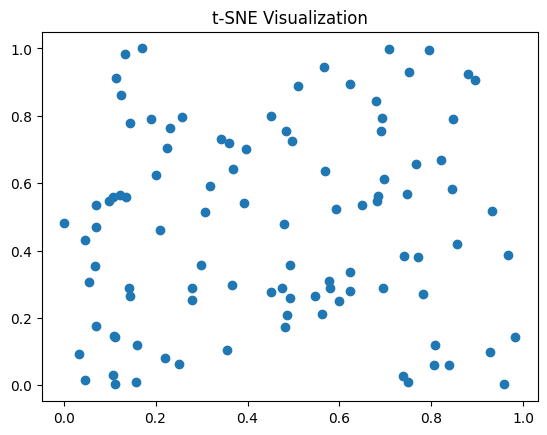

In [25]:
# Create a random dataset (replace this with your actual data)
np.random.seed(0)
X_tSNE = np.random.rand(100, 50)  # 100 samples, 50 features

# Create an instance of your TSNE_class
tsne = TSNE_class(perplexity=30)

# Fit and transform the data to obtain the low-dimensional representation
Y = tsne.fit_transform(X_tSNE)

# Plot the results (optional)
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE Visualization")
plt.show()

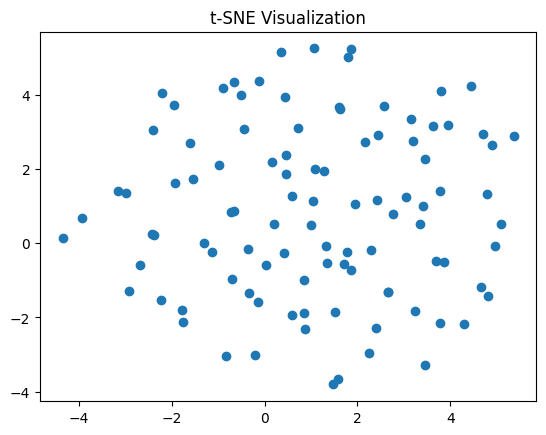

In [26]:
# Create an instance of the TSNE class
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

# Fit and transform the data to obtain the low-dimensional representation
Y = tsne.fit_transform(X_tSNE)

# Plot the results
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE Visualization")
plt.show()

Comparing both graphs, a similar distribution is evident. However, the graph of the code implemented with the classes have their axes normalized, from 0 to 1, while the graph of the python code has a different scale where negative and positive data are included.

## Exercise 4

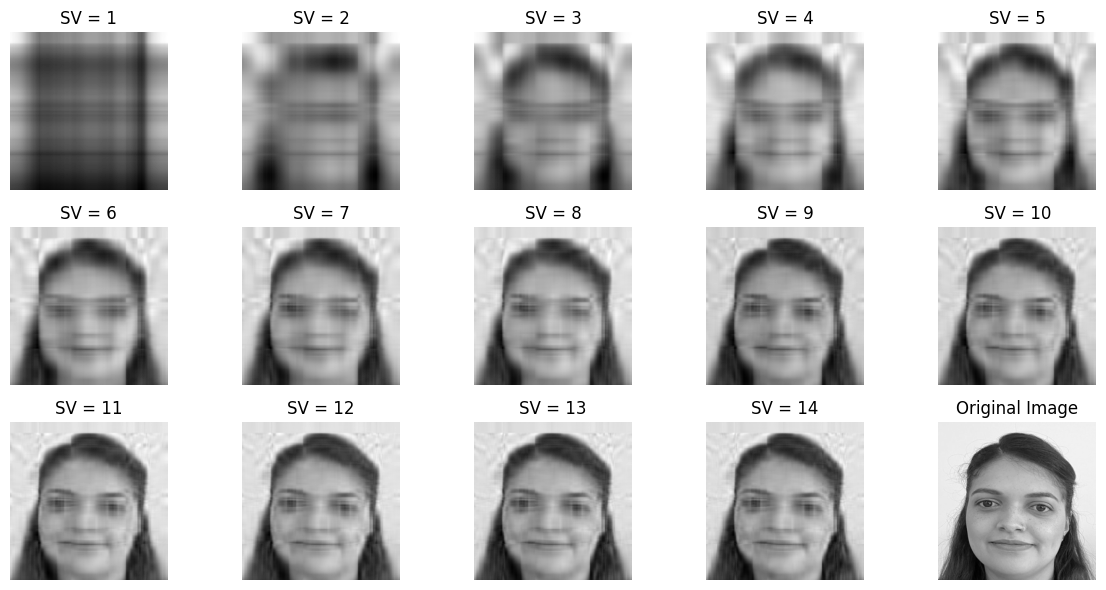

In [27]:
# Perform SVD on the image matrix
U, s, VT = np.linalg.svd(My_face_matrix, full_matrices=False)

# Define the range of singular values to use (e.g., from 1 to the rank of the matrix)
singular_value_range = range(1, min(My_face_matrix.shape) + 1)

# Create a figure to display the images
num_rows = 3
num_cols = 5

# Calculate the total number of subplots
total_subplots = num_rows * num_cols

# Ensure that the number of subplots matches the length of the singular_value_range
if total_subplots > len(singular_value_range):
    total_subplots = len(singular_value_range)

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, num_singular_values in enumerate(singular_value_range[:total_subplots]):
    # Reconstruct the image using the selected number of singular values
    reconstructed_image = np.dot(U[:, :num_singular_values], np.dot(np.diag(s[:num_singular_values]), VT[:num_singular_values, :]))

    # Determine the row and column for this subplot
    row = i // num_cols
    col = i % num_cols

    # Display the reconstructed image
    axs[row, col].imshow(reconstructed_image, cmap='gray')
    axs[row, col].set_title(f'SV = {num_singular_values}')
    axs[row, col].axis('off')

# Hide any remaining empty subplots
for i in range(total_subplots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# Display the original image
axs[-1, -1].imshow(My_face_matrix, cmap='gray')
axs[-1, -1].set_title('Original Image')
axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()

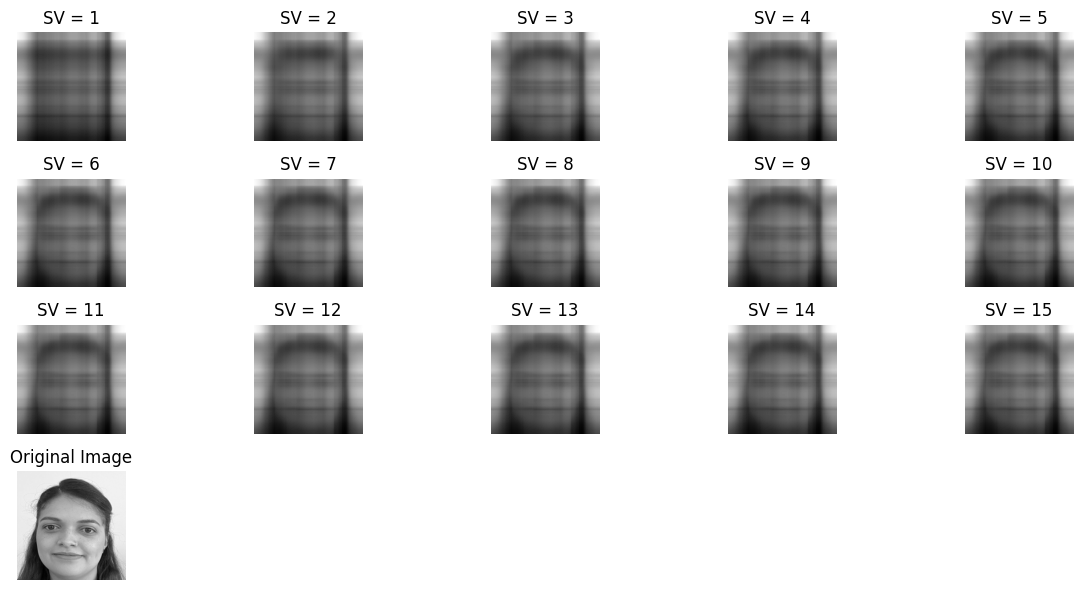

In [28]:
#Performe SVD descomposition
class SVD_class:
    def __init__(self):
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix):
        self.U, self.S, self.Vt = self._svd_decomposition(matrix)

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")

        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt

        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

def plot_svd_images(original_image, num_singular_values):
    total_subplots = num_singular_values + 1

    # Determine the number of rows and columns for subplots dynamically
    num_cols = 5
    num_rows = (total_subplots - 1) // num_cols + 1
    plt.figure(figsize=(12, 6))

    # Compute the SVD decomposition once outside the loop
    svd_class = SVD_class()
    svd_class.fit(original_image)  # Ensure that SVD is computed
    U, S, Vt = svd_class.U, svd_class.S, svd_class.Vt

    for i in range(num_singular_values):
        # Reduce the dimensions of U, S, and Vt
        U_reduced = U[:, :i + 1]
        S_reduced = S[:i + 1]
        Vt_reduced = Vt[:i + 1, :]

        # Reconstruct the image using the selected number of singular values
        reconstructed_image = np.dot(U_reduced, np.dot(np.diag(S_reduced), Vt_reduced))

        # Determine the subplot position dynamically
        subplot_pos = i + 1

        # Display the reconstructed image
        plt.subplot(num_rows, num_cols, subplot_pos)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f'SV = {i + 1}')
        plt.axis('off')

    # Display the original image
    plt.subplot(num_rows, num_cols, total_subplots)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Load your image matrix (replace 'My_face_matrix' with your actual image matrix)
    # My_face_matrix = ...

    # Define the number of singular values to use (maximum 15 due to available subplots)
    num_singular_values = min(15, min(My_face_matrix.shape))

    # Plot the images with progressively increasing singular values
    plot_svd_images(My_face_matrix, num_singular_values)


Comparing the matrices with both codes, it is evident that in the python code the image begins to stabilize until it reaches its original form, while in the code of the classes, the image stabilized from SV 2 but did not reach the clarification of the original image. This can be due to the mathematical tools that the classes have from their origin, while python already has them standardized.

## Exercise 5

In [29]:
mnist = load_digits()
#mnist=load_digits(return_X_y=False)
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [30]:
#mnist.target
X = mnist.data
y = mnist.target

In [31]:
X_filtered = X[(y==0) | (y==8)]
y_filtered = y[(y==0) | (y==8)]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=42)

In [33]:
model = LogisticRegression()
model

LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8,
       8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8,
       8, 0, 8, 0, 0, 8, 8, 8, 8, 0, 8, 0, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0,
       0, 0, 8, 0, 0, 8, 0, 8, 0, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 8, 8, 8])

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


According to the result obtained, an accuracy of 100% is being presented, which in real life is not so possible. This result can be associated with a possible overfitting of the data.

## Exercise 6

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [38]:
class SVD_class:
    def _init_(self, matrix):
        self.matrix = matrix
        self.U = None
        self.S = None
        self.Vt = None

    def fit(self, matrix = None):
        self.U, self.S, self.Vt = self._svd_decomposition(self.matrix)

    def fit_transform(self, data = None):
        self.fit()
        return self.transform()

    def transform(self):
        if self.U is None or self.S is None or self.Vt is None:
            raise ValueError("SVD not computed. Call fit or fit_transform first.")
        
        # Adjust the dimensions for the dot product
        U = self.U
        S = np.diag(self.S)
        Vt = self.Vt
        
        return np.dot(U, np.dot(S, Vt))

    def _svd_decomposition(self, A):
        # Implement SVD from scratch (truncated to the rank)
        AAT = np.dot(A, A.T)
        eigenvalues, eigenvectors = np.linalg.eig(AAT)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        singular_values = np.sqrt(eigenvalues)
        U = eigenvectors
        V = np.dot(A.T, U)
        Vt = V.T

        return U, singular_values, Vt

In [47]:
# Create an instance of the SVD_class
svd = SVD_class(X_scaled)  # Assuming X_scaled is your data

# Fit and transform the data
X_svd_class_DR = svd.fit_transform()

# X_svd now contains the reduced dimensionality representation of your data using SVD

TypeError: SVD_class() takes no arguments

In [41]:
# Create an instance of the PCA_class with the desired number of components (e.g., n_components=2)
pca = PCA_class(n_components=2)

# Fit and transform the data
X_pca_class_DR = pca.fit_transform(X_scaled)  # Assuming X_scaled is your data

# X_pca now contains the reduced dimensionality representation of your data using PCA

In [42]:
# Create an instance of the TSNE_class with the desired perplexity (e.g., perplexity=30)
tsne = TSNE_class(perplexity=50)

# Fit and transform the data
X_tsne_class_DR = tsne.fit_transform(X_scaled)  # Assuming X_scaled is your data

# X_tsne now contains the reduced dimensionality representation of your data using t-SNE

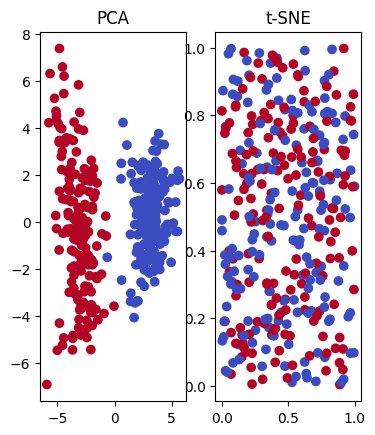

In [45]:
#plt.figure(figsize=(15, 5))
#plt.subplot(131)
#plt.scatter(X_svd_class_DR[:, 0], X_svd_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
#plt.title('SVD')

plt.subplot(132)
plt.scatter(X_pca_class_DR[:, 0], X_pca_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('PCA')

plt.subplot(133)
plt.scatter(X_tsne_class_DR[:, 0], X_tsne_class_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('t-SNE')

plt.show()

In [48]:
# Split the data into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_filtered, test_size=0.25, random_state=42)

# Train a classifier on the original data
clf_original = LogisticRegression()
clf_original.fit(X_train_scaled, y_train_scaled)
y_pred_original = clf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test_scaled, y_pred_original)

# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_pca_class_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_pca_class_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - PCA): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - PCA): 1.00


In [49]:
# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_tsne_class_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_tsne_class_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - tSNE): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - tSNE): 0.53


Observing the results obtained, it is evident that regardless of the algorithms used to reduce dimensionality, an accuracy of 1 is always obtained, which suggests that the dataset used always leads to overfitting.

## Exercise 7

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [51]:
# SVD
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
X_svd_DR = X_scaled @ Vt.T[:, :2]

# PCA
pca = PCA(n_components=2)
X_pca_DR = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne_DR = tsne.fit_transform(X_scaled)

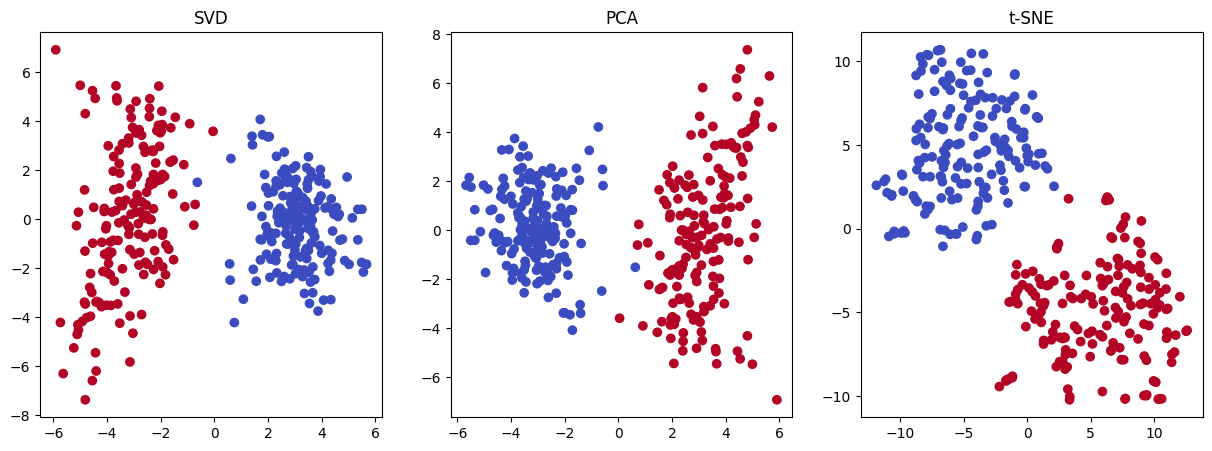

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_svd_DR[:, 0], X_svd_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('SVD')

plt.subplot(132)
plt.scatter(X_pca_DR[:, 0], X_pca_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('PCA')

plt.subplot(133)
plt.scatter(X_tsne_DR[:, 0], X_tsne_DR[:, 1], c=y_filtered, cmap='coolwarm')
plt.title('t-SNE')

plt.show()

In [53]:
# Split the data into train and test sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_filtered, test_size=0.25, random_state=42)

# Train a classifier on the original data
clf_original = LogisticRegression()
clf_original.fit(X_train_scaled, y_train_scaled)
y_pred_original = clf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test_scaled, y_pred_original)

# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_pca_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_pca_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - PCA): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - PCA): 1.00


In [54]:
clf_reduced = LogisticRegression()
clf_reduced.fit(X_svd_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_svd_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - SVD): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - SVD): 1.00


In [55]:
# Train a classifier on reduced data (e.g., PCA)
clf_reduced = LogisticRegression()
clf_reduced.fit(X_tsne_DR, y_filtered)
y_pred_reduced = clf_reduced.predict(X_tsne_DR)
accuracy_reduced = accuracy_score(y_filtered, y_pred_reduced)

print(f'Accuracy (Original Data): {accuracy_original:.2f}')
print(f'Accuracy (Reduced Data - tSNE): {accuracy_reduced:.2f}')

Accuracy (Original Data): 1.00
Accuracy (Reduced Data - tSNE): 1.00


Observing the results obtained, it is evident that regardless of the algorithms used to reduce dimensionality, an accuracy of 1 is always obtained, which suggests that the dataset used always leads to overfitting.

## Exercise 8

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and data compression. While PCA is effective in many cases, it can be sensitive to outliers and noise in the data. To make PCA more robust, you can employ several strategies:

* Standardization (Z-score normalization): Before applying PCA, standardize your data by subtracting the mean and dividing by the standard deviation of each feature. This ensures that all features have the same scale and prevents features with larger variances from dominating the PCA results.

* Outlier Detection and Removal: Identify and handle outliers in your dataset. Outliers can have a significant impact on the principal components. Techniques like the IQR (Interquartile Range) method or robust statistical measures can be used to detect and remove outliers.

* Feature Scaling: In some cases, scaling the features to a specific range (e.g., [0, 1]) instead of standardization can make PCA more robust, especially if you have features with very different ranges.

* Data Transformation: Consider applying data transformations like the log, square root, or Box-Cox transformations to handle skewed data distributions and make PCA less sensitive to outliers.

* Dimensionality Reduction: If your dataset is very high-dimensional, consider performing dimensionality reduction techniques like feature selection or feature extraction (e.g., using methods like t-SNE or UMAP) before applying PCA. This can reduce noise and computational complexity.

* Sparse PCA: If you suspect that only a subset of features is important, you can use Sparse PCA, which encourages sparsity in the loadings of the principal components, making the results more interpretable and potentially robust to noise.

* Kernel PCA: In cases where your data is not linearly separable, Kernel PCA can be used. It applies a kernel trick to map data into a higher-dimensional space, where it may become more separable, before performing PCA. Kernel PCA can handle non-linear relationships in the data.

* Robust PCA: Robust PCA methods, such as Principal Component Pursuit (PCP) or the Robust Principal Component Analysis (RPCA) algorithm, explicitly aim to separate low-rank components (signal) from sparse outliers (noise) in the data. These methods are designed to handle data with outliers and noise.

* Cross-Validation: Use cross-validation techniques to assess the robustness of your PCA results. This involves splitting the data into training and testing sets to evaluate how well the PCA model generalizes to new data.

* Regularization: Introduce regularization terms in the PCA algorithm to prevent overfitting to noise. Regularized PCA methods like Ridge PCA or Lasso PCA add penalty terms to the optimization objective to discourage extreme loadings.

* Bootstrap Resampling: Apply bootstrap resampling to assess the variability of the principal components and their stability with respect to different subsets of the data. This can help identify robust components.

* Robust Estimators: Consider using robust estimators of covariance matrices, such as the Minimum Covariance Determinant (MCD) or the Ledoit-Wolf shrinkage estimator, which are less sensitive to outliers compared to the sample covariance matrix.

Choosing the appropriate strategy or combination of strategies depends on the characteristics of your dataset and the specific goals of your analysis. Experimentation and domain knowledge are often crucial for determining the best approach to make PCA more robust for your particular data.

## Exercise 9

UMAP, which stands for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique used for visualizing and clustering high-dimensional data. It is particularly useful for exploratory data analysis, visualization, and discovering underlying patterns in complex datasets. UMAP is often used in fields such as machine learning, data analysis, and data visualization.

The underlying mathematical principles behind UMAP are a combination of ideas from various mathematical and computational fields, including:

* Topological Data Analysis (TDA): UMAP draws inspiration from topological concepts like manifold learning. It assumes that data points lie on a low-dimensional manifold embedded in a high-dimensional space. Manifolds are topological spaces that are locally similar to Euclidean space but may have more complex global structures.

* Graph Theory: UMAP constructs a graph representation of the data, where data points are connected by edges based on their similarity. This similarity graph helps capture both local and global structures in the data.

* Riemannian Geometry: UMAP considers the data manifold as a Riemannian manifold. This means that it accounts for the curvature and distances on the manifold, which can be different from the Euclidean distances in the high-dimensional space.

* Optimization: UMAP employs optimization techniques to learn a mapping from the high-dimensional space to a lower-dimensional space while preserving the topological and geometric properties of the data. It aims to find an embedding that minimizes the discrepancy between pairwise similarities in the high-dimensional space and the lower-dimensional space.

The main steps involved in UMAP's algorithm include:

* Constructing a high-dimensional fuzzy topological representation of the data.
* Optimizing a lower-dimensional representation to match the topological structure of the high-dimensional space.
* Generating a low-dimensional embedding of the data.

UMAP has several advantages:

* Preservation of Local and Global Structure: UMAP is effective at preserving both local and global relationships within the data, making it suitable for visualizing complex datasets with intricate structures.

* Scalability: UMAP can handle large datasets with many data points, making it suitable for big data analysis.

* Flexibility: UMAP allows users to control the degree of emphasis on preserving different aspects of the data structure through hyperparameters, providing flexibility in visualization and analysis.

* Interpretability: The resulting UMAP embeddings are often more interpretable than other dimensionality reduction techniques like t-SNE.

UMAP is useful for various tasks, including:

* Data Visualization: UMAP is primarily used for visualizing high-dimensional data in a lower-dimensional space (usually 2D or 3D), making it easier to explore and understand the data's underlying structure.

* Clustering: UMAP can be used as a preprocessing step for clustering algorithms by reducing the dimensionality of the data while preserving its inherent structure.

* Anomaly Detection: UMAP can help identify outliers or anomalies in the data by visualizing them in a separate region of the embedding.

* Feature Engineering: UMAP can be applied to perform feature engineering or feature selection by visualizing the importance of different features in the lower-dimensional space.

Overall, UMAP is a powerful tool for exploratory data analysis and visualization, especially when dealing with high-dimensional and complex datasets.

## Exercise 10

Latent Dirichlet Allocation (LDA) is a probabilistic model used for topic modeling and document classification. It is based on several mathematical principles and concepts from the field of Bayesian statistics, probability theory, and linear algebra. Here are the key mathematical principles behind LDA:

* Probabilistic Modeling: LDA is a probabilistic generative model for text data. It assumes that documents are created through a generative process involving topics and words. The model assigns probabilities to different aspects of this process.

* Dirichlet Distributions: LDA uses Dirichlet distributions to model the distribution of topics in documents and the distribution of words in topics. The Dirichlet distribution is a probability distribution over probability distributions. In LDA, it represents the prior belief about the distribution of topics in documents and words in topics.

* Bayesian Inference: LDA employs Bayesian inference to estimate the latent variables, such as the distribution of topics in documents and words in topics, given the observed data (the words in the documents). Bayesian inference combines prior knowledge (from the Dirichlet distributions) and observed data to update the model's parameters.

* Gibbs Sampling or Variational Inference: To perform Bayesian inference in LDA, Markov Chain Monte Carlo (MCMC) methods like Gibbs sampling or variational inference are commonly used. These techniques iteratively sample values for the latent variables from their conditional distributions until a stable solution is reached.

* Linear Algebra: LDA involves matrix factorization techniques to estimate the topic-document and topic-word distributions. These factorizations help uncover the underlying structure of the data.

* Multinomial Distribution: LDA models the word generation process within each document using a multinomial distribution. This distribution represents the probability of selecting a word from a particular topic.

LDA is useful for several natural language processing (NLP) tasks:

* Topic Modeling: LDA is primarily used for unsupervised topic modeling, where it discovers latent topics in a collection of documents. Each topic is characterized by a distribution of words, and each document is represented as a mixture of topics. It's valuable for organizing and summarizing large document collections.

* Document Classification: LDA can also be used for document classification tasks. By assigning documents to topics, LDA can help categorize documents into predefined or discovered topics, which can aid in content recommendation and search.

* Information Retrieval: LDA can enhance information retrieval systems by enabling better understanding and matching of user queries with relevant documents. It can also improve document clustering and ranking.

* Content Recommendation: LDA can be used in recommendation systems to identify similar documents or content items based on their topic distributions. This can improve content recommendations for users.

* Content Summarization: LDA can assist in summarizing large volumes of text by extracting the most representative topics and sentences from a set of documents.

Overall, LDA is a versatile tool for understanding the thematic structure of text data and has applications in a wide range of fields, including text mining, information retrieval, content analysis, and more.

## Exercise 11

In [56]:
# Initialize Flask app
app = Flask(__name__)

# Define a route to classify MNIST digits
@app.route('/classify', methods=['POST'])
def classify_digit():
    try:
        # Receive the image data from the request
        image_data = request.files['image'].read()

        # Preprocess the image (convert to grayscale, resize, and flatten)
        image = Image.open(io.BytesIO(image_data)).convert('L')
        image = image.resize((28, 28))
        image_array = np.array(image).flatten() / 255.0

        # Perform simple rule-based classification
        predicted_class = np.argmax(image_array)

        # Return the predicted class as JSON
        response_data = {'class': int(predicted_class)}
        return jsonify(response_data)

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.9.254:5000
Press CTRL+C to quit
